In [149]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display as dsp
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats

In [150]:
crime = pd.read_excel('data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

crime.columns = crime.iloc[3]
crime.drop(crime.index[[0,1,2,3]], inplace = True)
crime.index = range(len(crime))
crime.rename(index = str, columns = {'Violent\ncrime' : 'Violent Crimes',
              'Murder and\nnonnegligent\nmanslaughter': 'Murder',
              'Rape\n(revised\ndefinition)1': 'Rape Old', 
              'Rape\n(legacy\ndefinition)2' : 'Rape New',
              'Aggravated\nassault' : 'Aggrevated Assault', 
              'Property\ncrime' : 'Property Crime',
              'Larceny-\ntheft' : 'Larceny-Theft', 
              'Motor\nvehicle\ntheft' : 'Motor Theft', 'Arson3' : 'Arson'}, inplace = True)

dsp(crime.head())
print(crime['Robbery'].unique())
print(crime.columns)

3,City,Population,Violent Crimes,Murder,Rape Old,Rape New,Robbery,Aggrevated Assault,Property Crime,Burglary,Larceny-Theft,Motor Theft,Arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


[0 227 4 3 31 12 22 1 13 101 10 5 1322 9 2 48 17 11 8 29 7 76 19 6 60 16
 204 51 39 20 25 24 47 228 150 15 81 19170 166 21 100 26 918 23 203 34 400
 145 102 28 390 nan]
Index(['City', 'Population', 'Violent Crimes', 'Murder', 'Rape Old',
       'Rape New', 'Robbery', 'Aggrevated Assault', 'Property Crime',
       'Burglary', 'Larceny-Theft', 'Motor Theft', 'Arson'],
      dtype='object', name=3)


In [151]:
pop2 = crime['Population'] ** 2
pop2.rename("Pop^2", inplace = True)

Y = crime['Larceny-Theft'] + crime['Motor Theft'] + crime['Arson']
Y.rename('Property Crime', inplace = True)

features = pd.concat([crime['City'], Y, crime['Population'], pop2, 
                      crime['Murder'], crime['Robbery']], axis = 1)

features.dropna(inplace = True)

#Drop Outliers


dsp(features.head())

,City,Property Crime,Population,Pop^2,Murder,Robbery
0,Adams Village,10,1861,3463321,0,0
1,Addison Town and Village,21,2577,6640929,0,0
2,Akron Village,15,2846,8099716,0,0
6,Allegany Village,10,1781,3171961,0,0
7,Amherst Town,1917,118296,13993943616,1,31


In [152]:
features['BinMurder'] = (features['Murder'].apply(lambda x : np.where(x > 0, 1, 0)))
features['BinRobbery'] = (features['Robbery'].apply(lambda x : np.where(x > 0, 1, 0)))
#Ask how to incorporate binary vars in linear regression model
dsp(features.head())

print('Population data type: {}'.format(type(features['Population'])))
print('Length: {}'.format(len(features['City'])))


print(type(features['Population'].values))
#print(features['Population'])
#print('Cities Represented', features['City'].unique())

,City,Property Crime,Population,Pop^2,Murder,Robbery,BinMurder,BinRobbery
0,Adams Village,10,1861,3463321,0,0,0,0
1,Addison Town and Village,21,2577,6640929,0,0,0,0
2,Akron Village,15,2846,8099716,0,0,0,0
6,Allegany Village,10,1781,3171961,0,0,0,0
7,Amherst Town,1917,118296,13993943616,1,31,1,1


Population data type: <class 'pandas.core.series.Series'>
Length: 187
<class 'numpy.ndarray'>


<class 'list'>


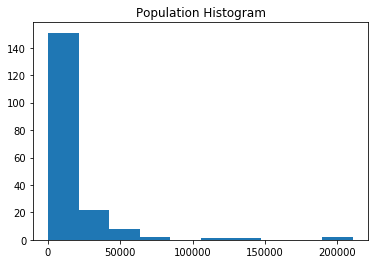

In [153]:
a = list(features['Population'].values)
#a = [1,2,2,3,4,5,5]
print(type(a))

#plt.hist(features['Population'].values)
plt.hist(a)
plt.title('Population Histogram')
plt.show()

# Initiate and Train Model

In [154]:
#Select Features
Y = features['Property Crime']

X = features[['Population', 'Pop^2', 'Murder', 'Robbery']]
X2 = features[['Population', 'Pop^2', 'BinMurder', 'BinRobbery']]

#Initiate and Fit model
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#Create prediction sets
predicted = regr.predict(X).ravel()
predicted2 = regr.predict(X2).ravel()

#Check Model
print('\nCoefficients:\n', regr.coef_)
print('\nIntercepts:\n', regr.intercept_)
print('\nR-Squared:\n', regr.score(X,Y))


Coefficients:
 [ 2.03586474e-02 -6.25537459e-08  1.06692043e+02  1.41745215e+00]

Intercepts:
 -48.55186156511883

R-Squared:
 0.919340218339979


# Check Model Assumptions
__Linear Relationships with Outcome__


Population
Pop^2
Murder
Robbery


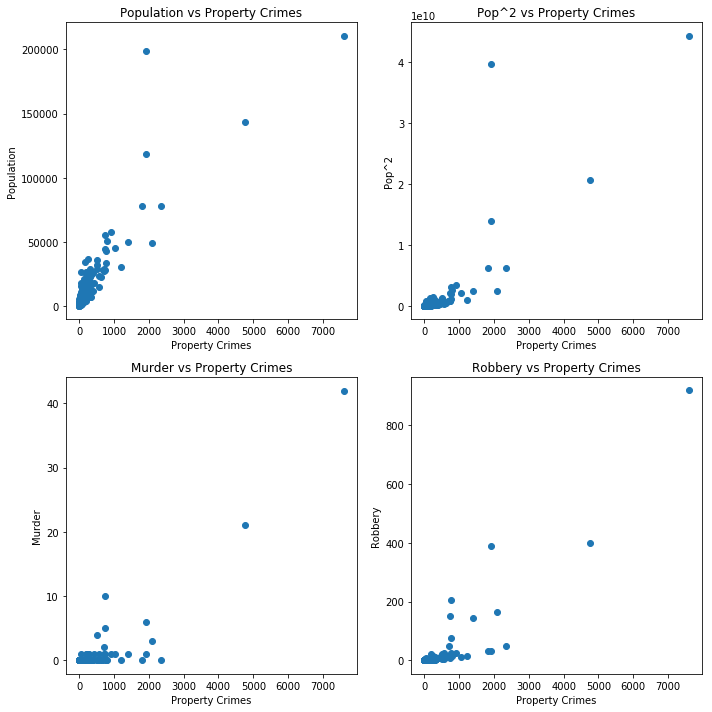

In [155]:
def plotme(X, Y, dimx, dimy):
    plt.figure(figsize = (10,10))
    i = 0
    while i < len(X.columns):
        print(X.columns[i])
        
        plt.subplot(dimx, dimy, i + 1)
        
        plt.scatter(Y, X[str(X.columns[i])])
        plt.title('{} vs Property Crimes'.format(X.columns[i]))
        
        plt.xlabel('Property Crimes')
        plt.ylabel(str(X.columns[i]))
        
        i += 1
    plt.tight_layout()
    plt.show()

plotme(X, Y, 2, 2)

__Multivariate Normality__

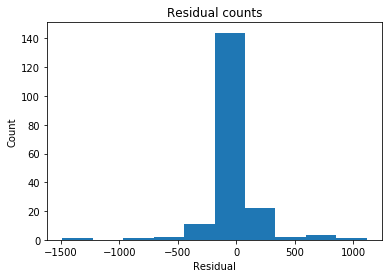

In [156]:
def multi_norm(X, Y, predicted):
    actual = Y
    residual = actual - predicted
    
    plt.hist(list(residual))
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    
multi_norm(X, Y, predicted) #Functs up when I run cell independantly

__Homoscedasticity__

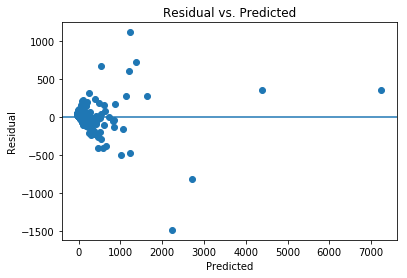

In [157]:
def homosced(X, Y, predicted):
    actual = Y
    residual = actual - predicted
    
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y = 0)
    plt.title('Residual vs. Predicted')
    plt.show()
    
homosced(X, Y, predicted)

__Low Multicolinearity__

In [158]:
#dsp(X.head())
#correlation_matrix = X.corr()
print(X.corr()) #Wat?

print(X2.corr())

Empty DataFrame
Columns: []
Index: []
            BinMurder  BinRobbery
BinMurder     1.00000     0.35378
BinRobbery    0.35378     1.00000


# Model Validation
__R-Square, Holdout, Folds__

In [159]:
def model_validation(mod, X, Y, holdout, folds):
    print('R-Square: ', mod.score(X,Y))
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = holdout, random_state = 101)
    print('\n{}% holdout:\n {}'.format(100 * holdout, mod.fit(X_train, Y_train).score(X_test, Y_test)))
    
    print('\n{} folds:\n {}'.format(folds, cross_val_score(mod, X, Y, cv = folds)))
    

print('Non-Binary Features:\n')    
model_validation(regr, X, Y, 0.20, 5)


print('\n\nBinary Features:\n')
model_validation(regr, X2, Y, 0.20, 5)
#Print R-Square
#print('R-Squared: ', regr.score(X,Y))

#holdout = 0.2
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = holdout, random_state = 101)


#print('\n{}% holdout:\n {}'.format(100 * holdout, regr.fit(X_train, Y_train).score(X_test, Y_test)))

#folds = 5

#print('\n{} folds:\n {}'.format(folds, cross_val_score(regr, X, Y, cv = folds)))

Non-Binary Features:

R-Square:  0.919340218339979

20.0% holdout:
 0.6799398782226179

5 folds:
 [ 0.68910136  0.7126779  -1.68773782  0.71618601  0.55291084]


Binary Features:

R-Square:  0.7274053806941895

20.0% holdout:
 0.587220130114001

5 folds:
 [0.85543979 0.72102868 0.40430152 0.65552872 0.75079295]


# Revisions
__Original Model Write-up__

My original model was based on a linear combination of the population, the square of the population, murder and robbery. I took a look at training the model both on the magnitudes of the number of robberies and murders and the binary presence/abscence of robberies or murders.

In [160]:
#Remove Outliers
q = features['Population'].quantile(0.90)
features[features['Population'] < q]
dsp(features.head())

Y = features['Property Crime']

X = features[['Population', 'Pop^2', 'Murder', 'Robbery']]
X2 = features[['Population', 'Pop^2', 'BinMurder', 'BinRobbery']]

predicted = regr.predict(X).ravel()
predicted2 = regr.predict(X2).ravel()

,City,Property Crime,Population,Pop^2,Murder,Robbery,BinMurder,BinRobbery
0,Adams Village,10,1861,3463321,0,0,0,0
1,Addison Town and Village,21,2577,6640929,0,0,0,0
2,Akron Village,15,2846,8099716,0,0,0,0
6,Allegany Village,10,1781,3171961,0,0,0,0
7,Amherst Town,1917,118296,13993943616,1,31,1,1


# Check Assumptions
__Linear Correlation with Outcome__

Population
Pop^2
Murder
Robbery


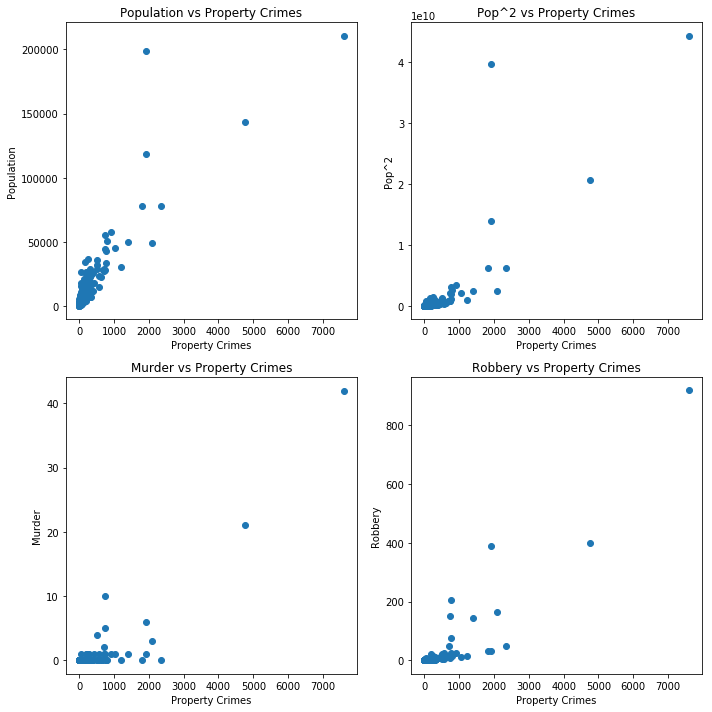

In [161]:
plotme(X, Y, 2, 2)

__Multivatiate Normality__

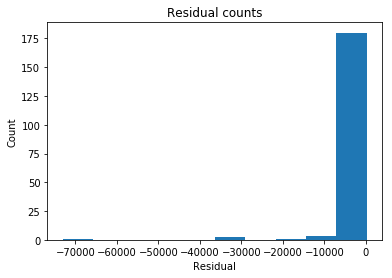

In [162]:
multi_norm(X, Y, predicted) #Wat?

__Homoscedasticity__

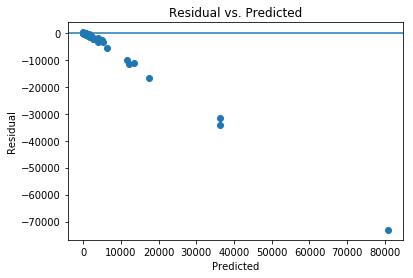

In [163]:
homosced(X, Y, predicted)

__Low Multicolinearity__

In [164]:
print('Correlation Matrix:\n',X.corr())

Correlation Matrix:
 Empty DataFrame
Columns: []
Index: []
